<a href="https://colab.research.google.com/github/OldBigOne/Learning_HW/blob/main/HW_Python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive # Підключаємо Диск
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

In [95]:
file_path_ads = '/content/drive/MyDrive/Colab_Notebooks/facebook_ads_data.csv'
df = pd.read_csv(file_path_ads)

In [4]:
#zero_check=(df==0).sum()
#zero_check

In [96]:
df=df[df['total_spend']!=0]
df.head(3)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [71]:
# Зробив різні колонки з датами, бо хочу.

df['Date'] = pd.to_datetime(df['ad_date'], format='mixed')
df['Weeknum'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.strftime('%B')
df['Year'] = df['Date'].dt.year
df['YM'] = df['Date'].dt.strftime('%Y %B')

In [7]:
df = df[df['ad_date'].str.contains('2021')]
df_daily=df[['Date','total_spend']].sort_values('Date')

In [8]:
df_spend_weekly=df.groupby('Weeknum')['total_spend'].sum().reset_index()
df_daily=df_daily.groupby('Date')['total_spend'].sum().reset_index()

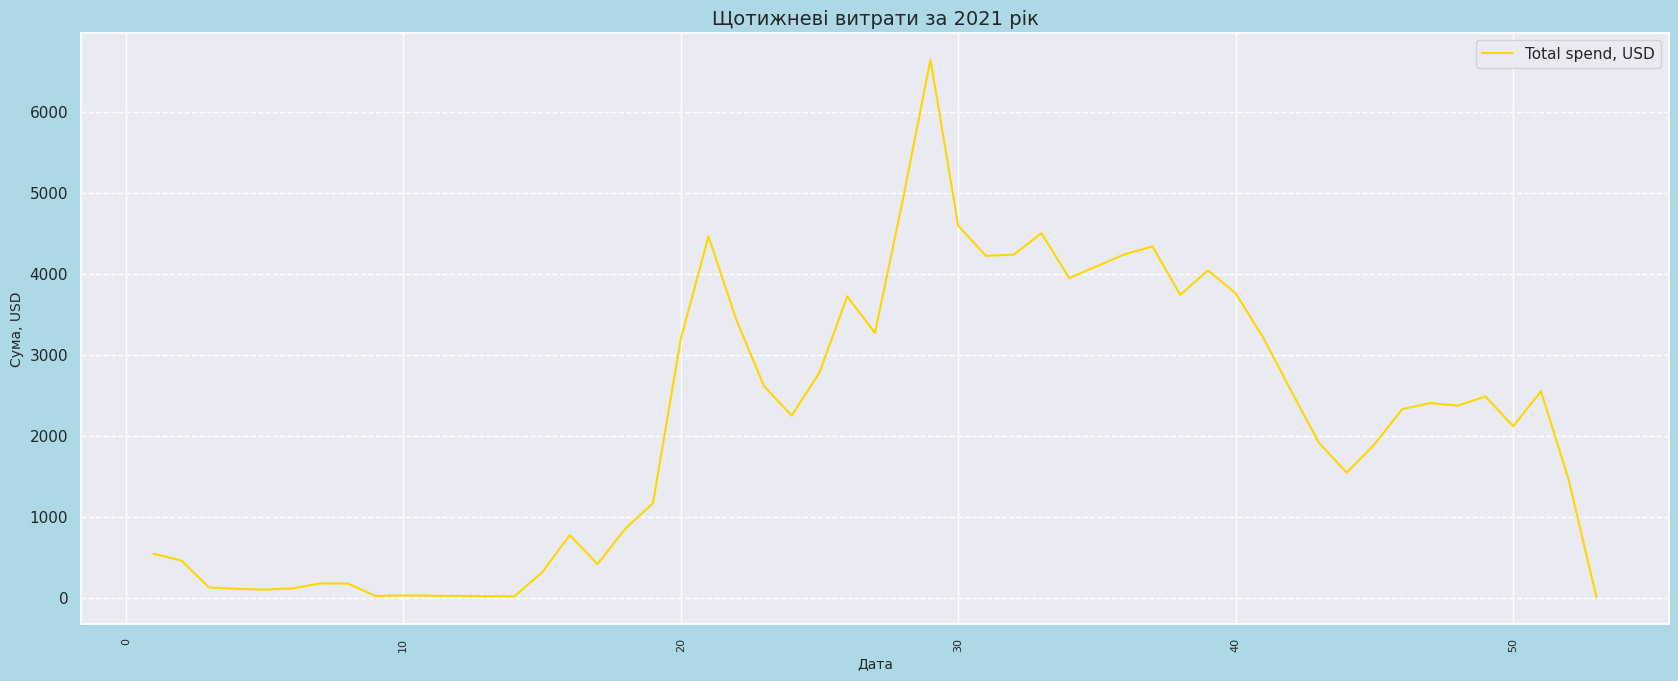

In [72]:
#Щотижневі витрати

plt.figure(figsize=(20.48, 7.680), facecolor='lightblue')
plt.plot(df_spend_weekly['Weeknum'], df_spend_weekly['total_spend'], label='Total spend, USD', color='gold')
plt.title('Щотижневі витрати за 2021 рік',fontsize=14)
plt.xlabel('Дата', fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.ylabel('Сума, USD', fontsize=10)
plt.grid(True,'major','y',linestyle='--')
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab_Notebooks/weekly_plot.png')

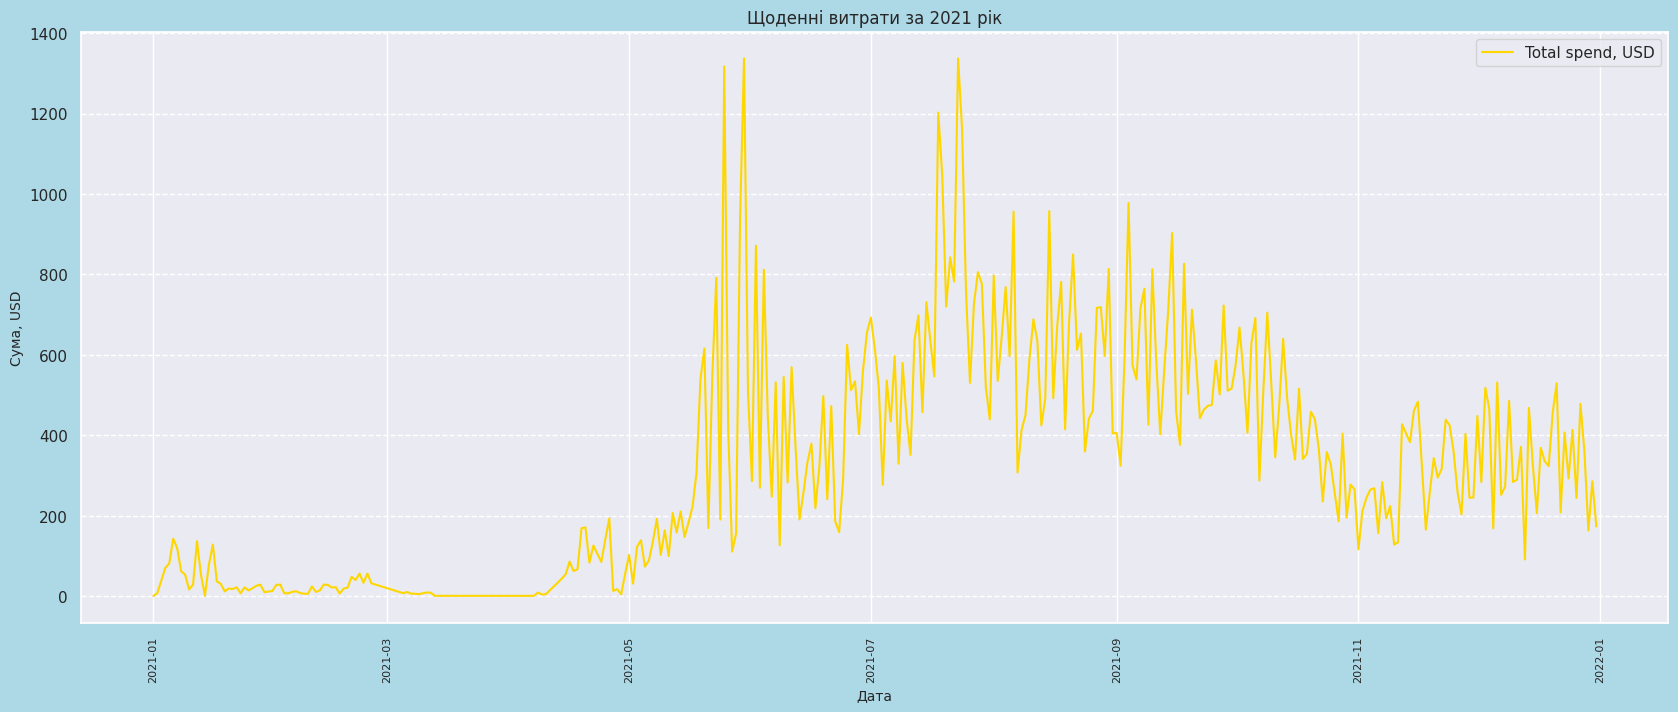

In [23]:
#Щоденні витрати

plt.figure(figsize=(20.48, 7.680), facecolor='lightblue')
plt.plot(df_daily['Date'], df_daily['total_spend'], label='Total spend, USD', color='gold')
plt.title('Щоденні витрати за 2021 рік')
plt.xlabel('Дата', fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.ylabel('Сума, USD', fontsize=10)
plt.grid(True,'major','y',linestyle='--')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Colab_Notebooks/daily_plot.png')

plt.show()

In [74]:
# Готуємо дані для РОМІ

df_romi=df[['Date','romi','total_spend']].sort_values('Date')
df_romi=df_romi.groupby('Date')[['total_spend','romi']].mean().reset_index()
df_romi['Romi_RM']=df_romi['romi'].rolling(window=2).mean()
df_romi['T_S_RM']=df_romi['total_spend'].rolling(window=2).mean()

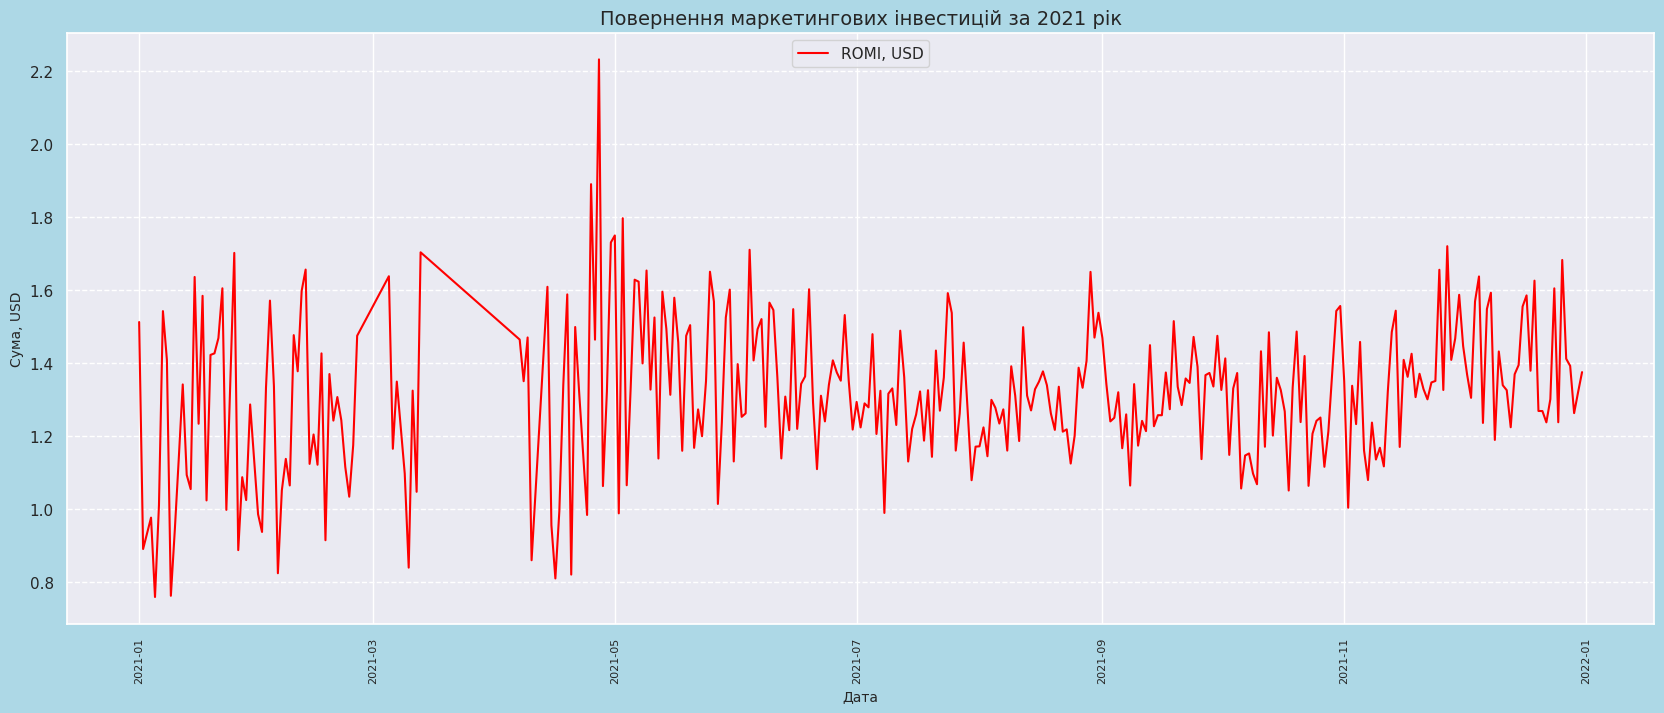

In [75]:
plt.figure(figsize=(20.48, 7.680), facecolor='lightblue')
plt.plot(df_romi['Date'], df_romi['romi'], label='ROMI, USD', color='red')
plt.title('Повернення маркетингових інвестицій за 2021 рік',fontsize=14)
plt.xlabel('Дата', fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.ylabel('Сума, USD', fontsize=10,)
plt.grid(True,'major','y',linestyle='--')
plt.legend(loc='upper center')
plt.show()

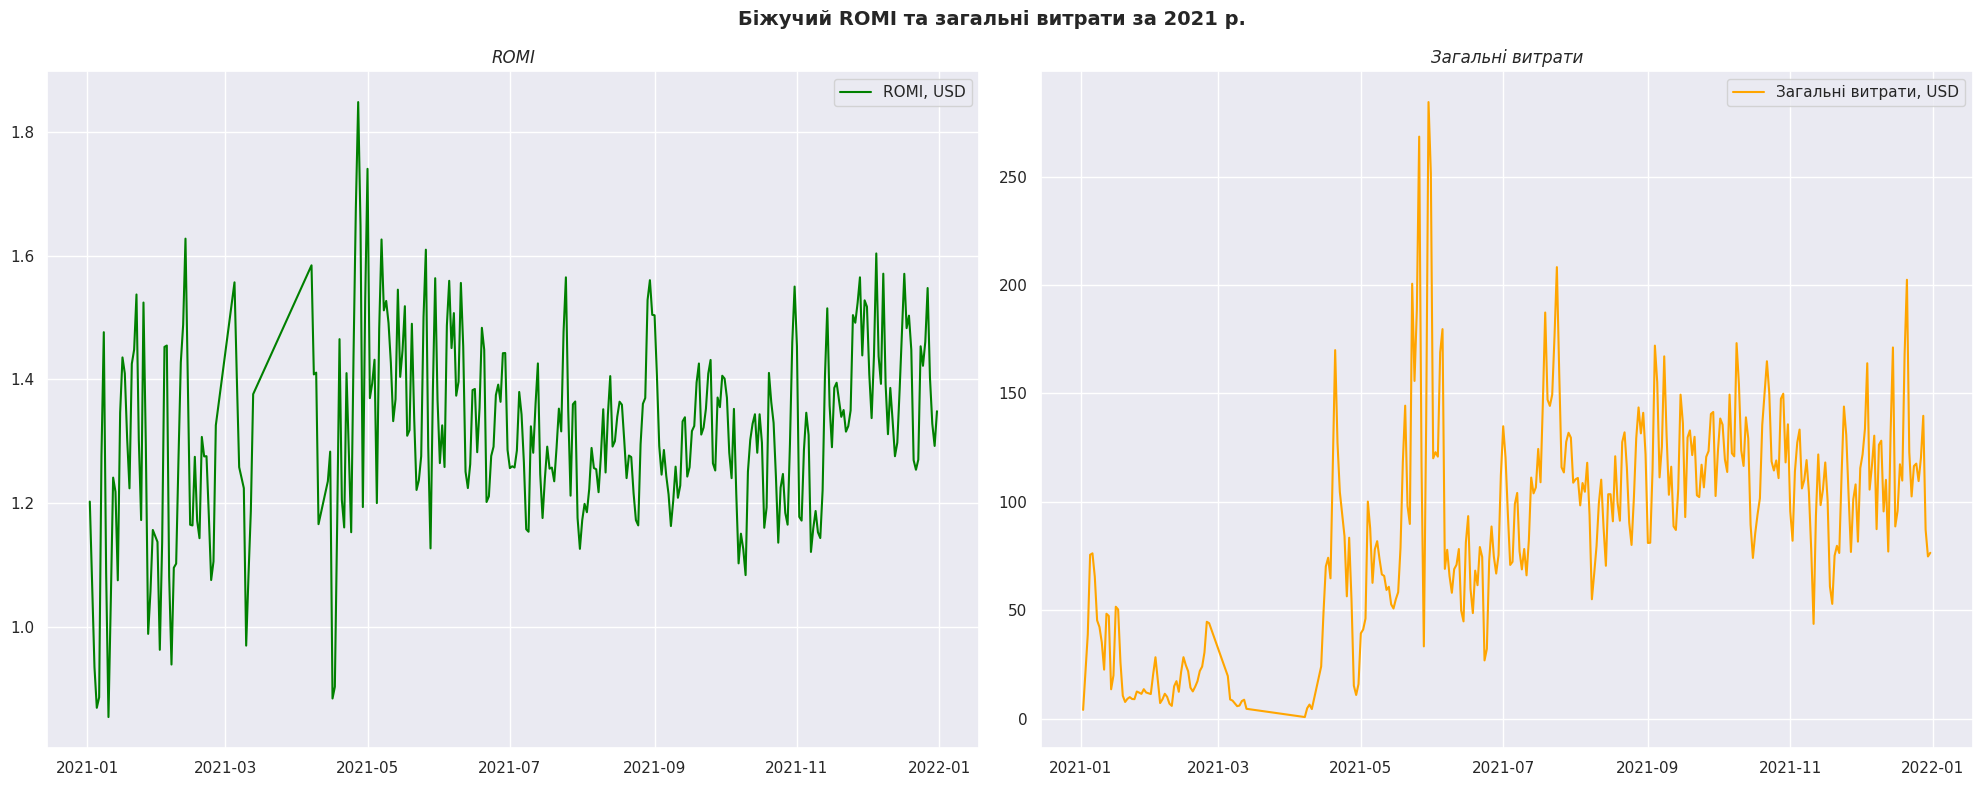

In [76]:
sns.set()
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
ax[0].plot(df_romi['Date'], df_romi['Romi_RM'], color='green', label='ROMI, USD')
ax[0].legend(loc='best')
ax[0].set_title("ROMI", fontstyle='italic')
ax[1].plot(df_romi['Date'], df_romi['T_S_RM'], color='orange', label='Загальні витрати, USD')
ax[1].legend(loc='best')
ax[1].set_title("Загальні витрати", fontstyle='italic')
fig.suptitle('Біжучий ROMI та загальні витрати за 2021 р.', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [97]:
df_bonus = df[['campaign_name','romi','total_spend']]

In [98]:
df_bonus=df_bonus.groupby('campaign_name').agg({'total_spend':sum, 'romi':sum}).reset_index()

<ipython-input-98-2bf9f5936412>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_bonus=df_bonus.groupby('campaign_name').agg({'total_spend':sum, 'romi':sum}).reset_index()
<ipython-input-98-2bf9f5936412>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_bonus=df_bonus.groupby('campaign_name').agg({'total_spend':sum, 'romi':sum}).reset_index()


In [100]:
df_bonus.head(20)

,campaign_name,total_spend,romi
0,Brand,539.92,124.129263
1,Crazy discounts,2175.29,149.897575
2,Discounts,2856.39,120.969760
3,Electronics,23920.42,208.296664
4,Expansion,67212.82,141.125258
5,Hobbies,11326.97,121.418808
6,Lookalike,63631.09,288.853058
7,New items,2936.97,124.076123
8,Promos,4993.84,248.774371
9,Trendy,1992.31,167.453207


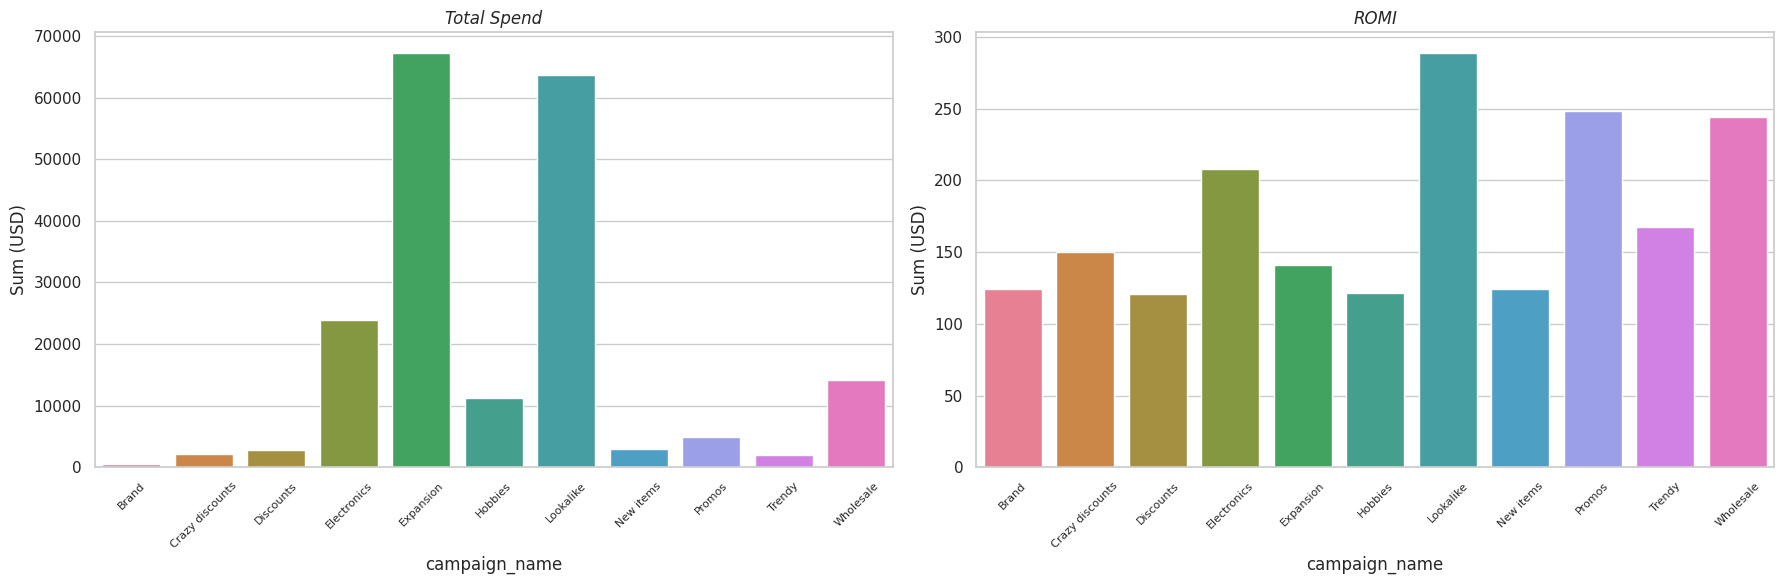

In [118]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
sns.barplot(x='campaign_name', y='total_spend', hue='campaign_name', data=df_bonus, ax=ax[0])
ax[0].set_title("Total Spend", fontstyle='italic')
ax[0].set_ylabel("Sum (USD)", fontsize=12)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, rotation=45)

sns.barplot(x='campaign_name', y='romi', hue='campaign_name', data=df_bonus, ax=ax[1])
ax[1].set_title("ROMI", fontstyle='italic')
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_ylabel("Sum (USD)", fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

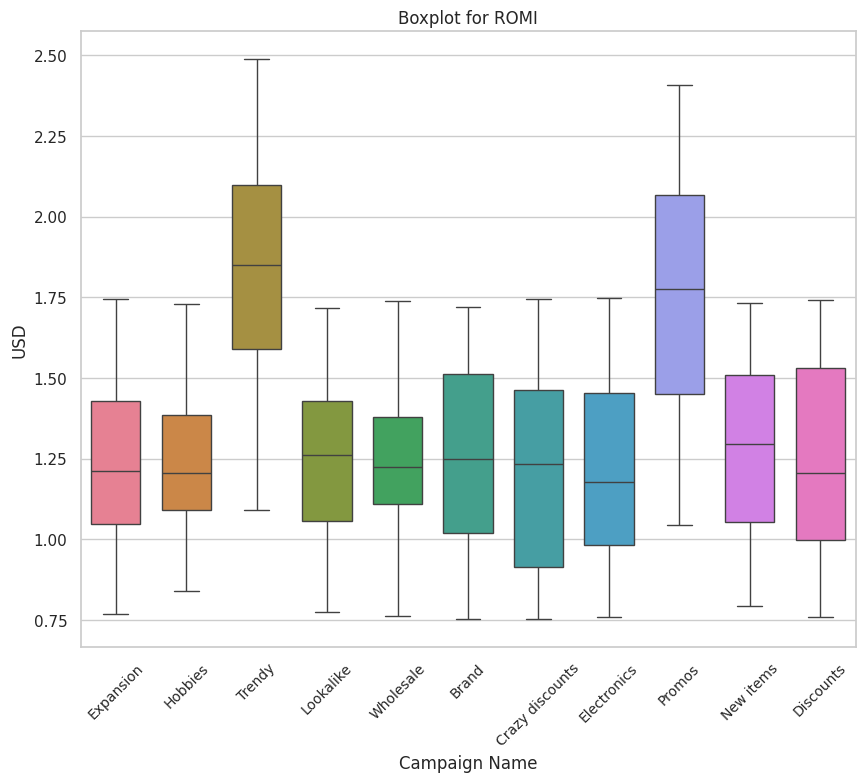

In [155]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(df, x='campaign_name', y='romi', hue='campaign_name', showfliers=True, width=0.7, whis=2, ax=ax)
ax.set_xlabel('Campaign Name')  # x-axis label
ax.set_ylabel('USD')  # y-axis label
ax.set_title('Boxplot for ROMI')
ax.tick_params(axis='x', labelsize=10, rotation=45)
plt.show()

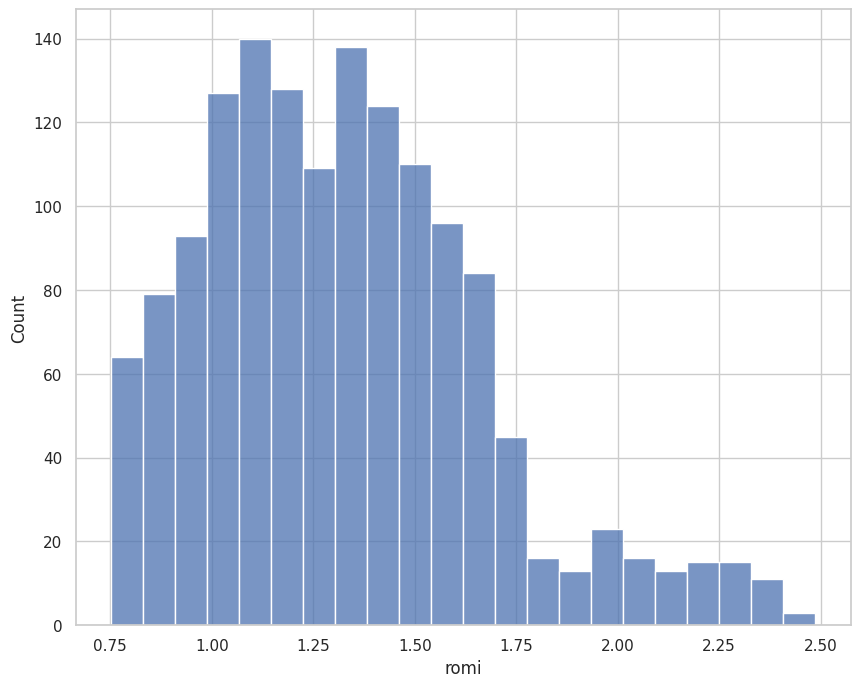

In [154]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(df, x='romi')
plt.show()

In [157]:
df_corr = df[['total_spend',	'total_impressions',	'total_clicks',	'total_value',	'cpc',	'cpm',	'ctr',	'romi']]

In [159]:
matrix=df_corr.corr()

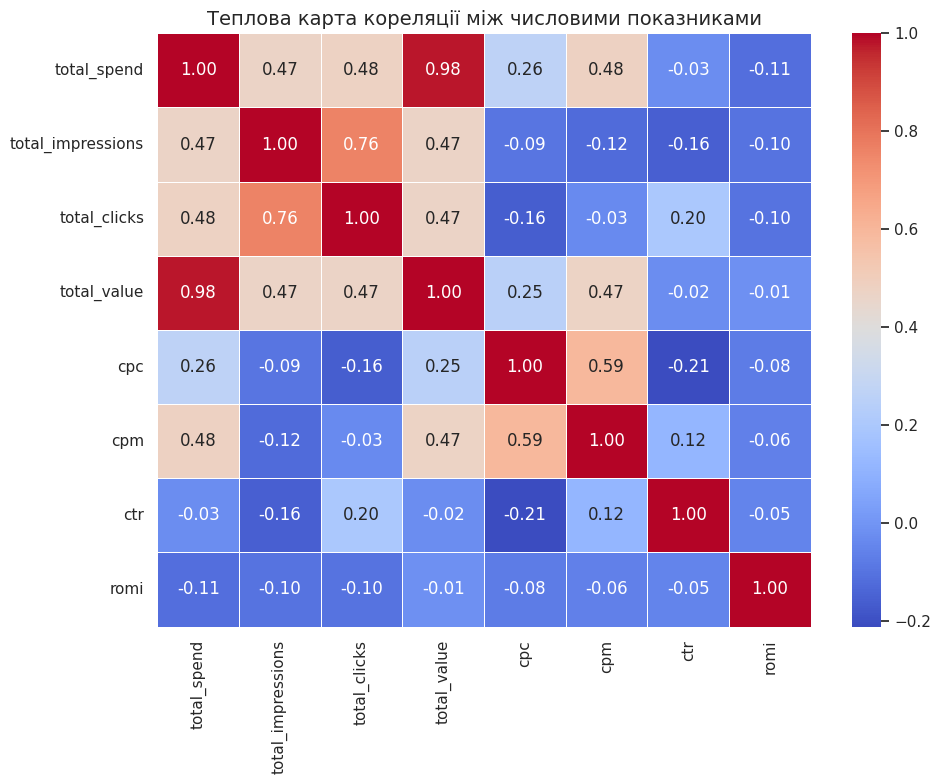

In [161]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляції між числовими показниками', fontsize=14)
plt.tight_layout()
plt.show()

In [162]:
df_lmplot=df[['total_spend', 'total_value']]

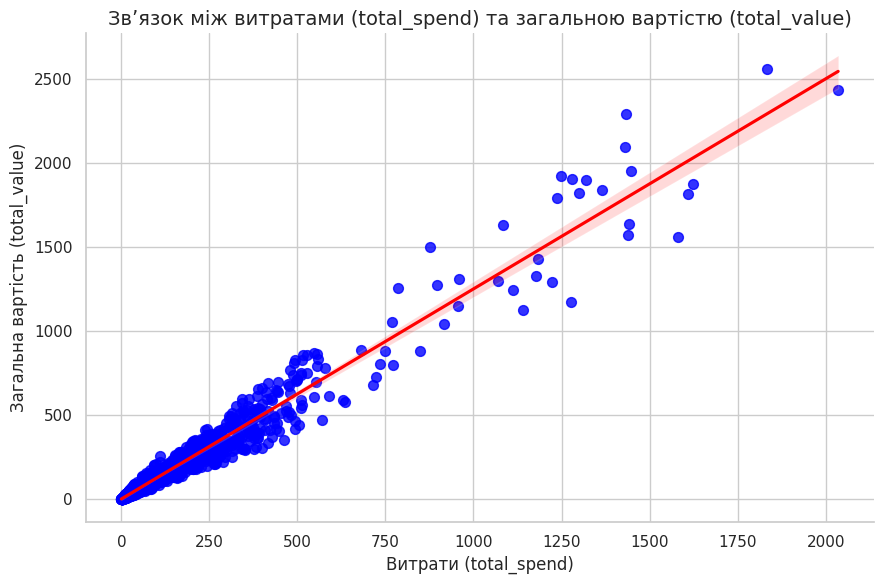

In [169]:
sns.lmplot(x='total_spend', y='total_value', data=df_lmplot, aspect=1.5, height=6, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Звʼязок між витратами (total_spend) та загальною вартістю (total_value)', fontsize=14)
plt.xlabel('Витрати (total_spend)', fontsize=12)
plt.ylabel('Загальна вартість (total_value)', fontsize=12)

plt.tight_layout()  # Підганяє розмітку, щоб графік не перекривався
plt.show()